# Importamos la base de datos

Primeramente, importamos las librerías necesarias para la sección.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DB = pd.read_csv('Mall_Customers.csv')

print('Cantidad de datos por atributo =', str(len(DB['Age'])) + '.')
DB.head()

Cantidad de datos por atributo = 200.


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Normalizamos los datos

Utilizamos la función de normalización generada con anterioridad, agregando además sus parámetros necesarios.

In [3]:
def Normaliza(DB):
    DB = DB.to_numpy()

    Atributos = DB[0]
    NoAtributos = len(Atributos)
    Instancias = DB.T[0]
    NoInstancias = len(Instancias)

    MaximoDeAtributos = []
    MinimoDeAtributos = []
    for idx, element in enumerate(Atributos):
      CaractMax = max(DB.T[idx])
      CaractMin = min(DB.T[idx])
      MaximoDeAtributos.append(CaractMax)
      MinimoDeAtributos.append(CaractMin)

    DBNorm = []
    MaximoNormalizado = 1
    MinimoNormalizado = 0
    RangoNormalizado = MaximoNormalizado - MinimoNormalizado
    for idx, element in enumerate(Atributos):
      CaractNorm = []
      if str(type(Atributos[idx]))[8 : -2] != 'str':
        RangodeDatos = MaximoDeAtributos[idx] - MinimoDeAtributos[idx]
        for idx2, element2 in enumerate(Instancias):
          if str(DB.T[idx][idx2]) != 'nan':
            D = DB.T[idx][idx2] - MinimoDeAtributos[idx]
            DPct = D / RangodeDatos
            dNorm = RangoNormalizado * DPct
            Normalizado = MinimoNormalizado + dNorm
            CaractNorm.append(Normalizado)
          else:
            CaractNorm.append(DB.T[idx][idx2])
      else:
        for idx2, element2 in enumerate(Instancias):
          CaractNorm.append(DB.T[idx][idx2])
      DBNorm.append(CaractNorm)
    return(DBNorm)

In [4]:
DB_Norm = Normaliza(DB)

Definimos los valores de X con los datos de ingresos anuales, y los valores de Y con los datos de edad.

In [5]:
X = np.array(DB_Norm[3])
Y = np.array(DB_Norm[2])

## Visualizamos los datos

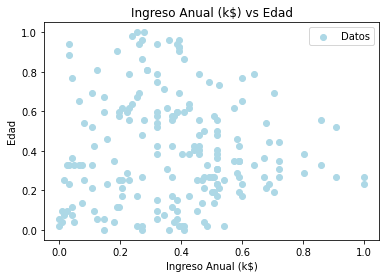

In [6]:
plt.scatter(X, Y, color = 'lightblue', label = 'Datos')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

Función para transformar los datos de entrada X e Y a puntos de dato con coordenadas (Xi, Yi).

In [7]:
def data2point(X, Y):
    puntos = []
    for idx, x in enumerate(X):
        puntos.append((x, Y[idx]))
    return(puntos)

Transformamos los datos X e Y a puntos de dato con coordenadas (Xi, Yi).

In [8]:
puntos = data2point(X, Y)

# K-means

Primeramente, importamos las librerías necesarias para la sección.

In [347]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from sklearn.cluster import KMeans

## Funciones propias

Función para generar n centroides aleatoriamente, en forma de lista.

Para valores de (X, Y) normalizados entre 0 y 1

In [157]:
def Centrs_aleat(NumDCentrs):
    idxCentrs = range(1, NumDCentrs + 1)

    Centrs = []
    for K in idxCentrs:
        Centrs.append((rd.random(), rd.random()))
    return(Centrs)

Función para generar n centroides mediante el promedio de los datos pertenecientes al clúster de cada centroide a generar.

In [158]:
def Centrs_promedio(Datos):
    Centrs = []
    for K in Datos:
        sumaX = 0
        sumaY = 0
        for data in K:
            sumaX += data[0]
            sumaY += data[1]
        X = sumaX / len(K)
        Y = sumaY / len(K)
        Centrs.append((X, Y))
    return(Centrs)

Función para calcular las distancias de cada punto hacia cada uno los centroides.

Generando un cúmulo de valores, correspondientes a cada punto, por cada centroide en la lista resultante.

In [159]:
def distACentrsXpunto(Centrs, DaXpuntos):
    dist = []
    for element in Centrs:
        distXData = []
        for DaXpunto in DaXpuntos:
            distData = ((element[0] - DaXpunto[0])**2 + (element[1] - DaXpunto[1])**2)**0.5
            distXData.append(distData)
        dist.append(distXData)
    return(dist)

Función para determinar a qué centroide corresponde cada uno de los puntos (datos), según la distancia previamente calculada, hacia cada centroide.

In [160]:
def Dato2CentrX(D2Xpuntos, dist):
    MinimIdx = []
    for idx, D2Xpunto in enumerate(D2Xpuntos):
        inim = []
        for element in dist:
            inim.append(element[idx])
        minimo = min(inim)
        MinIdx = inim.index(minimo)
        MinimIdx.append(MinIdx)
    return(MinimIdx)

Función para agrupar cada dato con el resto de datos que pertenecen a un mismo clúster.

In [138]:
def AgrupDatos(Centroides, CentroideXDato, ADPuntos):
    PuntosDCentr = []
    for idx, Centroide in enumerate(Centroides):
        PuntosDColorX = []
        positions = np.where(CentroideXDato == idx)
        for position in positions[0]:
            PuntosDColorX.append(ADPuntos[position])
        PuntosDCentr.append(PuntosDColorX)
    return(PuntosDCentr)

Función para predecir a qué clúster pertenecen nuevos datos ingresados en la forma [(X1,Y1),...,(Xn,  Yn)].

Elige el clúster con el centroide más cercano al dato ingresado.

In [162]:
def Predict(data):
    distancias = distACentrsXpunto(Centroides, data)
    CentroideXDato = Dato2CentrX(data, distancias)
    Pertenencias = []
    for element in CentroideXDato:
        Pertenencias.append(element + 1)
    Pertenencia = np.array(Pertenencias)
    return(Pertenencia)

## Método de codo

Lo utilizaremos para decidir cuántos grupos (clúster) son necesarios.

Generamos 9 centroides que estén lo más alejado es¿ntre ellos posible, a través de la generación de centroides para k-means++ que se muestra en su respectiva sección más adelante.

In [281]:
Centrs = CentrsPP(9, puntos)

Analizamos gráficamente los centroides generados.

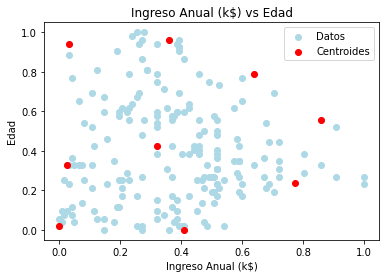

In [282]:
Xp = []
Yp = []
for element in Centrs:
    Xp.append(element[0])
    Yp.append(element[1])

plt.scatter(X, Y, color = 'lightblue', label = 'Datos')
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

Utilizamos los centroides generados para generar 9 iteraciones, en las cuales cada una contiene de 1 a 9 centroides generados, siendo el número de iteración la cantidad de centroides que contiene.

In [283]:
idxCentrs = len(Centrs)

Centrs4KM = []
for idxCentr in range(1, (idxCentrs+1)):
    Centrs4KM_par = []
    for idx, K in enumerate(range(1, idxCentr + 1)):
        Centrs4KM_par.append(Centrs[idx])
    Centrs4KM.append(Centrs4KM_par)

Calculamos la distancia de cada punto de dato hacia cada uno de los diferentes centroides en cada iteración, los cuales tienen distinta cantidad de centroides.

In [284]:
dist_glob = []
for Centr in Centrs4KM:
    dist = distACentrsXpunto(Centr, puntos)
    dist_glob.append(dist)

En base a las distancias calculadas, en cada iteración ubicamos a qué centroide corresponde cada dato. 

In [285]:
minimf_glob = []
for dist in dist_glob:
    MinimIdx = Dato2CentrX(puntos, dist)
    minimf_glob.append(MinimIdx)

Transformamos la lista que contiene a qué centroide corresponde cada dato en cada una de las iteraciones, en una matriz. Esto con el fin de poder utilizar la funcion de numpy.where.

In [286]:
minimf_glob = np.array(minimf_glob)

Generamos gráficamente el gráfico tipo codo, para ubicar el valor de K óptimo.

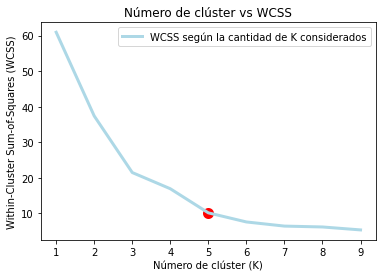

In [375]:
WCSS = []
for idx1, Centr in enumerate(Centrs4KM):
    sumD = 0
    for idx2, K in enumerate(Centr):
        pos = np.where(minimf_glob[idx1] == idx2)
        for element in pos[0]:
            sumD += (((puntos[element][0] - K[0])**2 + (puntos[element][1] - K[1])**2)**0.5)**2
    WCSS.append(sumD)

idxClusts  = idxCentrs = len(Centrs)
    
plt.plot(range(1, (idxClusts+1)), WCSS, color = 'lightblue', label = 'WCSS según la cantidad de K considerados', linewidth = 3)
plt.scatter(5, WCSS[4], color = 'red', linewidth = 5)
plt.title('Número de clúster vs WCSS')
plt.xlabel('Número de clúster (K)')
plt.ylabel('Within-Cluster Sum-of-Squares (WCSS)')
plt.legend()
plt.show()

De acuerdo a lo observado, se define que K = 5 es el número óptimo de clústers a considerar. 

Sin embargo, al realizar varias pruebas, nos podemos percatar que es muy variable el K óptimo, según los centroides inciales, oscilando entre 3 y 6. Esto, debido a que los centroides son generados de forma aleatoria.

## Centroides iniciales

Se generan de manera aleatoria los centroides iniciales de cada clúster, seleccionando el número de clústers según el método de codo previamente realizado.

In [325]:
Centroides = Centrs_aleat(5)

Analizamos gráficamente los centroides generados.

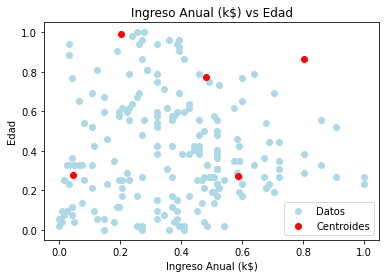

In [326]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

plt.scatter(X, Y, color = 'lightblue', label = 'Datos')
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

## Calcular las distancias euclidianas de cada punto hacia cada centroide de los clústers.

Primero necesitamos generar los puntos en formato (Xi, Yi).

En este punto ya están generados, pero coloca de nuevo al sección solo como forma de remarcar este proceso dentro de la metodología.

In [327]:
distancias = distACentrsXpunto(Centroides, puntos)

## Agrupar por distancias

En base a las distancias calculadas, en cada clúster ubicamos a qué centroide corresponde cada dato.

In [328]:
CentroideXDato = Dato2CentrX(puntos, distancias)

Transformamos la lista anterior en una matriz. Esto con el fin de poder utilizar la funcion de numpy.where.

In [329]:
CentroideXDato = np.array(CentroideXDato)

Agrupamos cada dato con el resto de datos que pertenecen a un mismo clúster.

In [330]:
PuntosDCentr = AgrupDatos(Centroides, CentroideXDato, puntos)

Visualizamos la agrupación de los datos en distintos clústers.

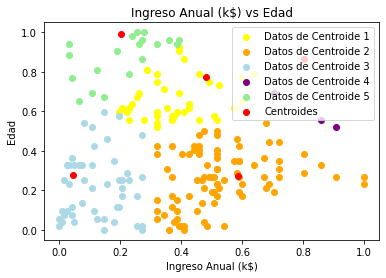

In [331]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, Puntos in enumerate(PuntosDCentr):
    XColor = []
    YColor = []
    for element in Puntos:
        XColor.append(element[0])
        YColor.append(element[1])
    plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

## Cambio el centroide para que sea el centroide de mi grupo.

Generamos los centroides mediante el promedio de los datos pertenecientes al clúster de cada centroide a generar.

In [332]:
Centroides = Centrs_promedio(PuntosDCentr)

Visualizamos los clústers de datos con su nuevo centroide.

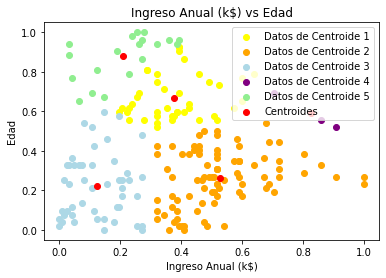

In [333]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, Puntos in enumerate(PuntosDCentr):
    XColor = []
    YColor = []
    for element in Puntos:
        XColor.append(element[0])
        YColor.append(element[1])
    plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

## Iteración de cambios de centroide

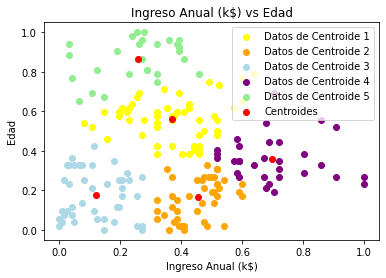

In [334]:
Centroides_anterior = 0

while Centroides_anterior != Centroides:
    Centroides_anterior = Centroides
    distancias = distACentrsXpunto(Centroides_anterior, puntos)
    CentroideXDato = Dato2CentrX(puntos, distancias)
    CentroideXDato = np.array(CentroideXDato)
    PuntosDCentr = AgrupDatos(Centroides_anterior, CentroideXDato, puntos)
    Centroides = Centrs_promedio(PuntosDCentr)
    Xp = []
    Yp = []
    for element in Centroides:
        Xp.append(element[0])
        Yp.append(element[1])

    Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

    for idx, Puntos in enumerate(PuntosDCentr):
        XColor = []
        YColor = []
        for element in Puntos:
            XColor.append(element[0])
            YColor.append(element[1])
        plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))

    plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
    plt.title('Ingreso Anual (k$) vs Edad')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Edad')
    plt.legend()
    display.clear_output(wait=True)
    plt.pause(1)

plt.show()

## Obtención del resultado

Una vez se cumpla el criterio de paro, el cual identifica que el centroide del clúster ya ha encontrado su lugar definitivo, tendremos la ubicación de cada centroide de clúster.

In [335]:
for idx, Centroide in enumerate(Centroides):
    print('El centroide', str(idx + 1), 'tiene coordenadas', str(Centroide) + '.')

El centroide 1 tiene coordenadas (0.3691617692545623, 0.5605950653120464).
El centroide 2 tiene coordenadas (0.45409836065573767, 0.16410256410256413).
El centroide 3 tiene coordenadas (0.11963309914129587, 0.17628205128205127).
El centroide 4 tiene coordenadas (0.7000512295081965, 0.35817307692307704).
El centroide 5 tiene coordenadas (0.25936768149882905, 0.8653846153846155).


## Calculos utilizando librería de scikit learn con K-means

Utilizamos los mismos datos para generar KMeans con librería para comparar resultados. 

In [343]:
puntos = data2point(X, Y)

kmeans = KMeans(n_clusters=5, init='random', n_init=1, random_state=0).fit(puntos)
CentroideXDato = kmeans.labels_
Centroides = kmeans.cluster_centers_
PuntosDCentr = AgrupDatos(Centroides, CentroideXDato, puntos)

Visualizamos los resultados de usar librería

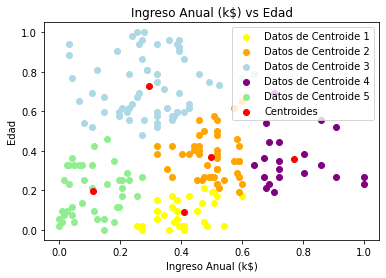

In [344]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, Puntos in enumerate(PuntosDCentr):
    XColor = []
    YColor = []
    for element in Puntos:
        XColor.append(element[0])
        YColor.append(element[1])
    plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

Imprimimos las coordenas resultantes de los centroides de cada clúster con librería, los cuales, al comprarlos con los obtenidos con las funciones generadas, notamos que se aproximan bastante, siendo variables por la generación aleatoria de los centroides iniciales.

In [345]:
for idx, Centroide in enumerate(Centroides):
    print('El centroide', str(idx + 1), 'tiene coordenadas', str(Centroide) + '.')

El centroide 1 tiene coordenadas [0.40983607 0.08910256].
El centroide 2 tiene coordenadas [0.49778005 0.36858974].
El centroide 3 tiene coordenadas [0.29427573 0.72982346].
El centroide 4 tiene coordenadas [0.76971116 0.35622711].
El centroide 5 tiene coordenadas [0.10963115 0.19567308].


# K-means ++

Primeramente, importamos las librerías necesarias para la sección.

In [348]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from sklearn.cluster import KMeans

## Funciones propias

Función para generar n centroides que estén lo más alejados posibles entre ellos en un rango entre 0 y 1.

In [142]:
def CentrsPP(NumDcentrs, PuntosIn):
    First_Centr = (rd.random(), rd.random())
    
    Centrs = [First_Centr]
    for NumCent in range(1, NumDcentrs, 1):
        Dists = distACentrsXpunto(Centrs, PuntosIn)
        Minpunto = Dists[0]
        for CentN in Dists:
            for idx, distN in enumerate(CentN):
                if distN < Minpunto[idx]:
                    Minpunto[idx]  = distN
        distmin = max(Minpunto)
        Minpunto = np.array(Minpunto)
        posMinpunto = np.where(Minpunto == distmin)
        Centrs.append(PuntosIn[posMinpunto[0][0]])
    
    return(Centrs)

## Centroides iniciales

Seguimos el valor de k = 5 obtenido en el método del codo en la sección anterior para generar 3 centroides lo más alejado posibles entre ellos.

In [361]:
Centroides = CentrsPP(5, puntos)

Mostramos visualmente dónde se encuntran los centroides recién generados.

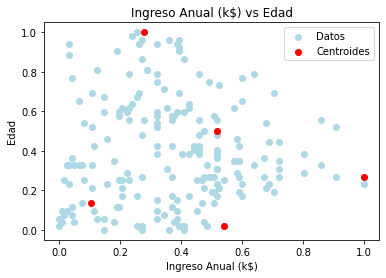

In [362]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

plt.scatter(X, Y, color = 'lightblue', label = 'Datos')
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

## Resto de pasos de K-means común

Luego de generar los centroides iniciales de una manera distinta, seguimos el resto de los pasos del método de K-means, hasta obtener los centroides finales y los datos agrupados en base a estos:

In [363]:
distancias = distACentrsXpunto(Centroides, puntos)

In [364]:
CentroideXDato = Dato2CentrX(puntos, distancias)

In [365]:
CentroideXDato = np.array(CentroideXDato)

In [366]:
PuntosDCentr = AgrupDatos(Centroides, CentroideXDato, puntos)

In [367]:
Centroides = Centrs_promedio(PuntosDCentr)

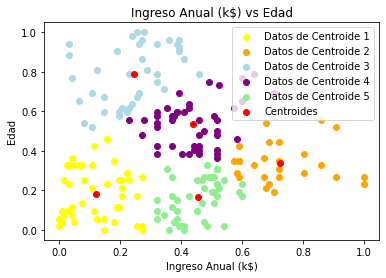

In [368]:
Centroides_anterior = 0

while Centroides_anterior != Centroides:
    Centroides_anterior = Centroides
    distancias = distACentrsXpunto(Centroides_anterior, puntos)
    CentroideXDato = Dato2CentrX(puntos, distancias)
    CentroideXDato = np.array(CentroideXDato)
    PuntosDCentr = AgrupDatos(Centroides_anterior, CentroideXDato)
    Centroides = Centrs_promedio(PuntosDCentr)
    Xp = []
    Yp = []
    for element in Centroides:
        Xp.append(element[0])
        Yp.append(element[1])

    Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

    for idx, Puntos in enumerate(PuntosDCentr):
        XColor = []
        YColor = []
        for element in Puntos:
            XColor.append(element[0])
            YColor.append(element[1])
        plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))

    plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
    plt.title('Ingreso Anual (k$) vs Edad')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Edad')
    plt.legend()
    display.clear_output(wait=True)
    plt.pause(1)

plt.show()

In [369]:
for idx, Centroide in enumerate(Centroides):
    print('El centroide', str(idx + 1), 'tiene coordenadas', str(Centroide) + '.')

El centroide 1 tiene coordenadas (0.12047274113610373, 0.1829159212880143).
El centroide 2 tiene coordenadas (0.7246508803885853, 0.3390313390313391).
El centroide 3 tiene coordenadas (0.2436475409836066, 0.7899038461538461).
El centroide 4 tiene coordenadas (0.4391621129326046, 0.5376068376068376).
El centroide 5 tiene coordenadas (0.45409836065573767, 0.16410256410256413).


## Calculos utilizando librería de scikit learn con K-means++

Obtenemos los datos de k-means++

In [370]:
puntos = data2point(X, Y)

kmeans = KMeans(n_clusters=5, init='k-means++', n_init=1, random_state=0).fit(puntos)
CentroideXDato = kmeans.labels_
Centroides = kmeans.cluster_centers_
PuntosDCentr = AgrupDatos(Centroides, CentroideXDato, puntos)

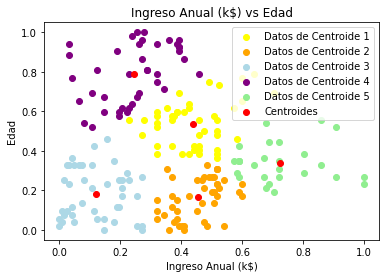

In [371]:
Xp = []
Yp = []
for element in Centroides:
    Xp.append(element[0])
    Yp.append(element[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, Puntos in enumerate(PuntosDCentr):
    XColor = []
    YColor = []
    for element in Puntos:
        XColor.append(element[0])
        YColor.append(element[1])
    plt.scatter(XColor, YColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(Xp, Yp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

De igual manera que con el método de K-mean común, los resultados son similares, sin embargo se puede notar una aproximación más precisa e incluso más exacta al ejecutar los métodos repetidamente.

In [372]:
for idx, Centroide in enumerate(Centroides):
    print('El centroide', str(idx + 1), 'tiene coordenadas', str(Centroide) + '.')

El centroide 1 tiene coordenadas [0.43916211 0.53760684].
El centroide 2 tiene coordenadas [0.45409836 0.16410256].
El centroide 3 tiene coordenadas [0.12047274 0.18291592].
El centroide 4 tiene coordenadas [0.24364754 0.78990385].
El centroide 5 tiene coordenadas [0.72465088 0.33903134].


# BIRCH

Primeramente, importamos las librerías necesarias para la sección.

In [376]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans

Función para calcular la suma lineal de los N datos en un grupo (cluster en inglés) (LS).

In [377]:
def LS(LSpuntos):
    LSsumaX = 0
    LSsumaY = 0
    for LSpunto in LSpuntos:
        LSsumaX += LSpunto[0]
        LSsumaY += LSpunto[1]
    return((LSsumaX, LSsumaY))

Función para calcular la suma cuadrática de los N datos en el cluster (SS).

In [378]:
def SS(SSpuntos):
    SSsuma = 0
    for SSpunto in SSpuntos:
        SSPX = SSpunto[0]**2
        SSPY = SSpunto[1]**2
        SSsuma += SSPX + SSPY
    return(SSsuma)

Función para calcular el centroide de una lista de puntos.

In [379]:
def centroid(Cpuntos):
    LS_temp = LS(Cpuntos)
    Nc = len(Cpuntos)
    return((LS_temp[0] / Nc, LS_temp[1] / Nc))

Función para encontrar el centroide de una carcaterística de grupo (Cluster Feature en inglés, abreviado como CF).

In [380]:
def CF_centroid(CFc):
    NCFc = CFc[0]
    CFcX = CFc[1][0] / NCFc
    CFcY = CFc[1][1] / NCFc
    return((CFcX, CFcY))

Función para encontrar el radio de un cluster.

In [381]:
def Radius(Rpuntos):
    Nr = len(Rpuntos)
    RP1 = SS(Rpuntos) / Nr
    RP2 = centroid(Rpuntos)**2
    R_temp = (RP1 - RP2)**0.5
    return(R_temp)

Función para encontrar el díametro de un cluster.

In [382]:
def Diameter(CFDin):
    DN = CFDin[0]
    DLs = LS([CFDin[1]])
    DLs = max(DLs)
    DSs = SS([CFDin[1]])
    DP1 = 2 * DN * DSs
    DP2 = -2 * (DLs**2)
    DP3 = DN**2
    D_temp = (DP1 + DP2) / DP3
    return(D_temp)

Función para generar el Cluster Feature (CF), de uno o varios puntos.

In [383]:
def CF(CFpuntos):
    LS_temp = LS(CFpuntos)
    SS_temp = SS(CFpuntos)
    NCF = len(CFpuntos)
    return([NCF, LS_temp, SS_temp])

Función para unir dos Cluster Feature (CFs)

In [384]:
def CF_merge(CF1, CF2):
    CF1_1 = CF1[1]
    CF2_1 = CF2[1]
    CFr = [CF1[0] + CF2[0], (CF1_1[0] + CF2_1[0], CF1_1[1] + CF2_1[1]), CF1[2] + CF2[2]]
    return(CFr)

Función para obtener la distancia euclidiana entre dos puntos.

In [385]:
def EC_distance(EDpuntos):
    dist = ((EDpuntos[0][0] - EDpuntos[1][0])**2 + (EDpuntos[0][1] - EDpuntos[1][1])**2)**0.5
    return(dist)

Función que ayuda a unir CF ingresando dentro del árbol (Tree en inglés) hasta llegar a los CFs

In [386]:
def ForinCentroids(FiCs, height):
    if height == 0:
        FiC_CF = FiCs
    elif height == 1:
        FiC_CF = [0, (0, 0), 0]
        for FiC in FiCs:
            FiC_CF = [FiC_CF[0] + FiC[0], (FiC_CF[1][0] + FiC[1][0], FiC_CF[1][1] + FiC[1][1]), FiC_CF[2] + FiC[2]]
    else:
        FiC_CF = [0, (0, 0), 0]
        idx = height - 1
        for FiC in FiCs:
            FiCt = ForinCentroids(FiC, idx)
            FiC_CF = [FiC_CF[0] + FiCt[0], (FiC_CF[1][0] + FiCt[1][0], FiC_CF[1][1] + FiCt[1][1]), FiC_CF[2] + FiCt[2]]
    return(FiC_CF)

Función que determina todos los centroides de la sección del tree seleccionado (nodo raíz, nodo rama, nodo hoja).

In [387]:
def AllCentroids(ACelements, ACnum):
    cent = []
    for CFi in ACelements:
        CFNLN = ForinCentroids(CFi, ACnum)
        centa = CF_centroid(CFNLN)
        cent.append(centa)
    return(cent)

Función para determinar todas las distancias entre un CF y todos los CF de un elemento del tree. 

In [388]:
def AllDists(ADelements, CFa):
    distAll = []
    for ADelement in ADelements:
        dista = EC_distance([CFa, ADelement])
        distAll.append(dista)
    return(distAll)

Función para encontrar la posición del CF más cercano de un elemento del tree.

In [389]:
def Select_TE(TreeElement, TEpunto, TEidx):
    TECent = AllCentroids(TreeElement, TEidx)
    TEDist = AllDists(TECent, TEpunto)
    TEmDist = min(TEDist)
    TEDist = np.array(TEDist)
    TEmPosa = np.where(TEDist == TEmDist)
    return(TEmPosa[0][0])

Función para determinar el CF más cercano a un punto y sus posiciones a través del tree, es decir, su posición en el nodo raíz (root node, en inglés), en el nodo rama (Non-Leaf Node, en inglés y abreviado como NLN) y el nodo hoja (Leaf Node, en inglés y abreviado como LN).

In [390]:
def CFClosest(Rootin, punto):
    mRootpos = Select_TE(Rootin, punto, 2)
    mNonLNpos = Select_TE(Rootin[mRootpos], punto, 1)
    mLeafNodepos = Select_TE(Rootin[mRootpos][mNonLNpos], punto, 0)
    CFmca = Rootin[mRootpos][mNonLNpos][mLeafNodepos]
    return(CFmca, mRootpos, mNonLNpos, mLeafNodepos)

Función para encontrar los dos CF más alejados entre ellos en un LN.

In [391]:
def farthest(LNin):
    FE = []
    FEpos = []
    for CFsplit1 in LNin:
        for CFsplit2 in LNin:
            FEt = EC_distance([CFsplit1[1], CFsplit2[1]])
            if FEt not in FE:
                FE.append(FEt)
                FEpos.append([CFsplit1, CFsplit2])
    F = max(FE)
    FE = np.array(FE)
    Fpos = np.where(FE == F)
    CFf1 = FEpos[Fpos[0][0]][0]
    CFf2 = FEpos[Fpos[0][0]][1]
    return(CFf1, CFf2)

Función para determinar todos los CF del tree.

In [392]:
def AllCF(ARoot):
    AllCFs = []
    for ANLN in ARoot:
        for ALN in ANLN:
            for ACF in ALN:
                AllCFs.append(ACF)
    return(AllCFs)

Función para reducir el tamaño del tree que se había construido hasta el momento de llamar a la función, incrementando el umbral (Threshold en inglés, abreviado como T) y construyendo un nuevo tree que agregue a cada CF según el nuevo T.

In [393]:
def ReduceXCFtree(Tin, RRoot, RBin, RLin):
    newT = Tin + 0.1
    CF_Done = AllCF(RRoot)
    newRoot = [[[CF_Done[0]]]]
    for Ridx, RCF in enumerate(CF_Done[1:]):
        CFmc_all = CFClosest(newRoot, RCF[1])
        CFmc = CFmc_all[0]
        Da = Diameter(newRoot[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
        CFa = RCF
        if Da < newT:
            newCF = CF_merge(CFa, CFmc)
            newRoot[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF
        else:
            if len(newRoot[CFmc_all[1]][CFmc_all[2]]) < RLin:
                newRoot[CFmc_all[1]][CFmc_all[2]].append(CFa)
            else:
                if len(newRoot[CFmc_all[1]]) < RBin:
                    CFf = farthest(newRoot[CFmc_all[1]][CFmc_all[2]])
                    
                    LNold = []
                    for element in newRoot[CFmc_all[1]][CFmc_all[2]]:
                        if element not in CFf:
                            LNold.append(element)
                         
                    LNold.append(CFa)
                    newRoot[CFmc_all[1]][CFmc_all[2]] = [CFf[0]]
                    newRoot[CFmc_all[1]].append([CFf[1]])
                    
                    for element in LNold:
                        tempD1 = EC_distance([CFf[0][1], element[1]])
                        tempD2 = EC_distance([CFf[1][1], element[1]])
                        dest = min([tempD1, tempD2])
                        if dest == 0:
                            newRoot[CFmc_all[1]][CFmc_all[2]].append(element)
                        else:
                            newRoot[CFmc_all[1]][-1].append(element)
                else:
                    NLNtemp = []
                    for element in newRoot[CFmc_all[1]]:
                        newCF = (0, (0, 0), 0)
                        for element2 in element:
                                newCF = [newCF[0] + element2[0], 
                                         (newCF[1][0] + element2[1][0], newCF[1][1] + element2[1][1]), 
                                         newCF[2] + element2[2]]
                        NLNtemp.append(newCF)

                    CFf = farthest(NLNtemp)

                    ele2 = []

                    for idx, elment in enumerate(NLNtemp):
                        if element not in CFf:
                            ele2.append(newRoot[CFmc_all[1]][idx])

                    ele2.append([CFa])

                    LNold = []
                    for element in NLNtemp:
                        if element not in CFf:
                            LNold.append(element)

                    LNold.append(CFa)

                    newRoot[CFmc_all[1]] = [[CFf[0]]]
                    newRoot.append([[CFf[1]]])

                    for idx, element in enumerate(LNold):
                        tempD1 = EC_distance([CFf[0][1], element[1]])
                        tempD2 = EC_distance([CFf[1][1], element[1]])
                        dest = min([tempD1, tempD2])

                        if dest == 0:
                            newRoot[CFmc_all[1]].append(ele2[idx])
                        else:
                            newRoot[-1].append(ele2[idx])
    
    return(newT, newRoot)

Función para eliminar Leaf Nodes (LFs) si su cantidad de datos es menor al promedio, determinandolos como Outliers, pero no definitivamente.

In [394]:
def RootOutliers(RootIn):
    OutNum = []
    for OutNLN in RootIn:
        for OutLN in OutNLN:
            for OutCF in OutLN:
                OutNum.append(OutCF[0])
                
    OutSum = 0
    for OutElement in OutNum:
        OutSum += OutElement
    
    OutProm = OutSum / len(OutNum)
    
    ROutRoot = []
    ROutliers = []
    for OutNLN in RootIn:
        ROutNLN = []
        for OutLN in OutNLN:
            ROutLN = []
            for OutCF in OutLN:
                if OutCF[0] >= (OutProm / 2):
                    ROutLN.append(OutCF)
                else:
                    ROutliers.append(OutCF)
            if len(ROutLN) != 0:
                ROutNLN.append(ROutLN)
        if len(ROutLN) != 0:
            ROutRoot.append(ROutNLN)
    
    return(ROutRoot, ROutliers)

Función general para generar el Tree, cambiando los puntos por CF y clasificandolos dentro de cada NLN y a su vez dentro de cada LN, además de unir CF o agregar nuevo deacuerdo al T. Reconstruyendolo si la memoria o límites de hoja (contastes B y L) eran excedidos y determinando si algunos LN son realmente outliers o no. Todo lo anterior con aydua de las funciones anteriores creadas.

In [395]:
def CFtree(puntosTree, T, BTree, LTree):
    DT = T
    NCFt = len(puntosTree)
    puntosSH = rd.sample(puntosTree, NCFt)
    
    fOutliers = []
    Root = [[[CF([puntosSH[0]])]]]
    for idx, punto in enumerate(puntosSH[1:]):
        CFmc_all = CFClosest(Root, punto)
        CFmc = CFmc_all[0]
        Da = Diameter(Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
        CFa = CF([punto])
        if Da < DT:
            newCF = CF_merge(CFa, CFmc)
            Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF
        else:
            if len(Root[CFmc_all[1]][CFmc_all[2]]) < LTree:
                Root[CFmc_all[1]][CFmc_all[2]].append(CFa)
            else:
                if len(Root[CFmc_all[1]]) < BTree:
                    CFf = farthest(Root[CFmc_all[1]][CFmc_all[2]])
                    
                    LNold = []
                    for element in Root[CFmc_all[1]][CFmc_all[2]]:
                        if element not in CFf:
                            LNold.append(element)
                         
                    LNold.append(CFa)
                    Root[CFmc_all[1]][CFmc_all[2]] = [CFf[0]]
                    Root[CFmc_all[1]].append([CFf[1]])
                    
                    for element in LNold:
                        tempD1 = EC_distance([CFf[0][1], element[1]])
                        tempD2 = EC_distance([CFf[1][1], element[1]])
                        dest = min([tempD1, tempD2])
                        if dest == 0:
                            Root[CFmc_all[1]][CFmc_all[2]].append(element)
                        else:
                            Root[CFmc_all[1]][-1].append(element)
                else:
                    if len(Root) < BTree:
                        NLNtemp = []
                        for element in Root[CFmc_all[1]]:
                            newCF = (0, (0, 0), 0)
                            for element2 in element:
                                    newCF = [newCF[0] + element2[0], 
                                             (newCF[1][0] + element2[1][0], newCF[1][1] + element2[1][1]), 
                                             newCF[2] + element2[2]]
                            NLNtemp.append(newCF)

                        CFf = farthest(NLNtemp)

                        ele2 = []

                        for idx, elment in enumerate(NLNtemp):
                            if element not in CFf:
                                ele2.append(Root[CFmc_all[1]][idx])

                        ele2.append([CFa])

                        LNold = []
                        for element in NLNtemp:
                            if element not in CFf:
                                LNold.append(element)

                        LNold.append(CFa)

                        Root[CFmc_all[1]] = [[CFf[0]]]
                        Root.append([[CFf[1]]])

                        for idx, element in enumerate(LNold):
                            tempD1 = EC_distance([CFf[0][1], element[1]])
                            tempD2 = EC_distance([CFf[1][1], element[1]])
                            dest = min([tempD1, tempD2])

                            if dest == 0:
                                Root[CFmc_all[1]].append(ele2[idx])
                            else:
                                Root[-1].append(ele2[idx])
                    else:
                        Reduced = ReduceXCFtree(DT, Root, BTree, LTree)
                        DT = Reduced[0]
                        Root = Reduced[1]
                        POL = RootOutliers(Root)
                        Root = POL[0]
                        fOutliers = POL[1]
    
    for PosOutliers in fOutliers:
        CFmc_all = CFClosest(Root, PosOutliers[1])
        CFmc = CFmc_all[0]
        Da = Diameter(Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
        CFa = PosOutliers
        if Da < DT:
            newCF = CF_merge(CFa, CFmc)
            Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF
            
    return(Root)

El algortimo de Birch consta de 4 fases, de las cuales la 2 y 4 son opcionales. En nuestro caso se decidió solo no agregar la Fase 2 para optimizar el CF por falta de información en cuanto a su implementación.

## Fase 1 - Construcción del CF-Tree

Elegimos un umbral T, y el tamaño de hoja o memoria con las constantes B y L. Además definimos los puntos que se agregarán al Tree, siendo estos últimos los de nuestra base de datos (DB por sus siglas en inglés).
Posteriormente, llamamos a la función para crear un CF-Tree con los puntos seleccionados.

In [445]:
Umbral = 0.15
B = 8
L = 8
puntos = puntos

rootf = CFtree(puntos, Umbral, B, L)

Mostramos gráficamente la districuión de las ramas dentro de la raíz del tree.

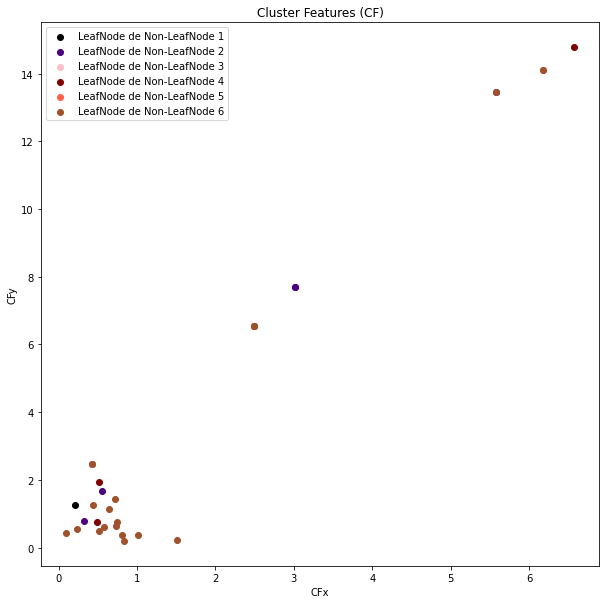

In [446]:
Colors = ['black', 'indigo', 'pink', 'maroon', 'tomato', 'sienna', 'navy', 'darkorange',
          'tan', 'papayawhip', 'oldlace', 'darkgoldenrod', 'gold', 'yellow', 'yellowgreen', 
          'lawngreen', 'lightgreen', 'darkgreen', 'aquamarine', 'teal', 'blue', 'skyblue', 'cyan', 'red']

figure(figsize=(10, 10))
for idx, NLNf in enumerate(rootf):
    XBf = []
    YBf = []
    for LNf in NLNf:
        for CFf in LNf:
            XBf.append(CFf[1][0])
            YBf.append(CFf[1][1])
            
    plt.scatter(XBf, YBf, color = Colors[idx], label = 'LeafNode de Non-LeafNode ' + str(idx + 1))

plt.title('Cluster Features (CF)')
plt.xlabel('CFx')
plt.ylabel('CFy')
plt.legend()
plt.show()

## Fase 3 - Agrupación global

Función para normalizar los puntos en forma de vector de una lista entre 0 y 1. 

In [447]:
def NormalizaPuntos(NPuntos):
    
    Xs = []
    Ys = []
    for NPunto in NPuntos:
        Xs.append(NPunto[0])
        Ys.append(NPunto[1])
    
    
    MaximoDeX = max(Xs)
    MinimoDeX = min(Xs)
    MaximoDeY = max(Ys)
    MinimoDeY = min(Ys)

    PuntosNorm = []
    MaximoNormalizado = 1
    MinimoNormalizado = 0
    RangoNormalizado = MaximoNormalizado - MinimoNormalizado
    for Npunto in NPuntos:
        RangodeDatosX = MaximoDeX - MinimoDeX
        RangodeDatosY = MaximoDeY - MinimoDeY
            
        DX = Npunto[0] - MinimoDeX
        DY = Npunto[1] - MinimoDeY
        
        DPctX = DX / RangodeDatosX
        DPctY = DY / RangodeDatosY
        
        dNormX = RangoNormalizado * DPctX
        dNormY = RangoNormalizado * DPctY
        
        NormalizadoX = MinimoNormalizado + dNormX
        NormalizadoY = MinimoNormalizado + dNormY
        
        PuntosNorm.append((NormalizadoX, NormalizadoY))
    
    return(PuntosNorm)

Reeutilizamos la función AgrupDatos descrita en la sección de K-means.

In [448]:
def AgrupDatos(Centroides, CentroideXDato, ADPuntos):
    PuntosDCentr = []
    for idx, Centroide in enumerate(Centroides):
        PuntosDColorX = []
        positions = np.where(CentroideXDato == idx)
        for position in positions[0]:
            PuntosDColorX.append(ADPuntos[position])
        PuntosDCentr.append(PuntosDColorX)
    return(PuntosDCentr)

Colocamos todos los puntos de las entradas del LN (Clusters), en una sola lista.

In [449]:
CFpoints = []
for NLNf in rootf:
    for LNf in NLNf:
        for CFf in LNf:
            CFpoints.append(CFf[1])

Normalizamos los puntos de los CFs entre 0 y 1.

In [450]:
CFpoints_Norm = NormalizaPuntos(CFpoints)

Utilizamos la librería de KMeans utilizando K-means++ como método de clasificación para generar los centroides de los CFs generados en el tree. Se utiliza un k = 5, siguiendo nuevamente el valor de k determinado por el método del codo.

In [451]:
CFkmeans = KMeans(n_clusters=5, init='k-means++', n_init=1, random_state=0).fit(CFpoints_Norm)
CFCentroideXDato = CFkmeans.labels_
CFCentroides = CFkmeans.cluster_centers_
CFPuntosDCentr = AgrupDatos(CFCentroides, CFCentroideXDato, puntos)

Visualizamos los centroides generados junto con los CFs obtenidos en el CF-Tree

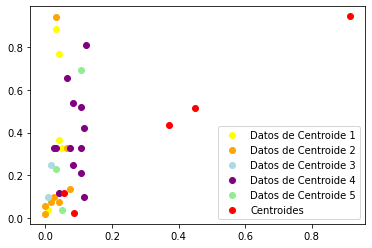

In [452]:
CFXp = []
CFYp = []
for CFelement in CFCentroides:
    CFXp.append(CFelement[0])
    CFYp.append(CFelement[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, CFPuntos in enumerate(CFPuntosDCentr):
    CFXColor = []
    CFYColor = []
    for CFelement in CFPuntos:
        CFXColor.append(CFelement[0])
        CFYColor.append(CFelement[1])
    plt.scatter(CFXColor, CFYColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(CFXp, CFYp, color = 'red', label = 'Centroides')
#plt.title('Ingreso Anual (k$) vs Edad')
#plt.xlabel('Ingreso Anual (k$)')
#plt.ylabel('Edad')
plt.legend()
plt.show()

## Fase 4 - Utilizar los centroides de la Fase 3 como semillas

Función para determinar las distancias de cada punto hasta los centroides generados por el CF-Tree.

In [453]:
def distACentrsXpunto(Centrs, DaXpuntos):
    dist = []
    for element in Centrs:
        distXData = []
        for DaXpunto in DaXpuntos:
            distData = ((element[0] - DaXpunto[0])**2 + (element[1] - DaXpunto[1])**2)**0.5
            distXData.append(distData)
        dist.append(distXData)
    return(dist)

Función para elegir a qué centroide pertenece cada dato.

In [454]:
def Dato2CentrX(D2Xpuntos, dist):
    MinimIdx = []
    for idx, D2Xpunto in enumerate(D2Xpuntos):
        inim = []
        for element in dist:
            inim.append(element[idx])
        minimo = min(inim)
        MinIdx = inim.index(minimo)
        MinimIdx.append(MinIdx)
    return(MinimIdx)

Utilizamos los centroides recién generados en la Fase 3, para clasificar los puntos de la base de datos inicial entre los k clusters, según la distancia mínima de cada dato respecto a cada cluster.

In [456]:
CFdistancias = distACentrsXpunto(CFCentroides, puntos)
CFCentroideXDato = Dato2CentrX(puntos, CFdistancias)
CFCentroideXDato = np.array(CFCentroideXDato)
CFPuntosDCentr = AgrupDatos(CFCentroides, CFCentroideXDato, puntos)

Visualizamos la clasificación inicial de los datos en K clusters.

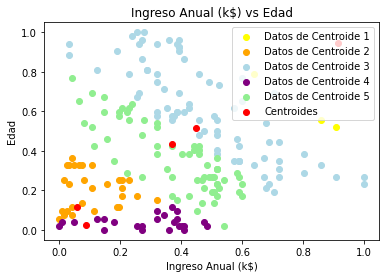

In [457]:
CFXp = []
CFYp = []
for CFelement in CFCentroides:
    CFXp.append(CFelement[0])
    CFYp.append(CFelement[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, CFPuntos in enumerate(CFPuntosDCentr):
    CFXColor = []
    CFYColor = []
    for CFelement in CFPuntos:
        CFXColor.append(CFelement[0])
        CFYColor.append(CFelement[1])
    plt.scatter(CFXColor, CFYColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(CFXp, CFYp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

Reeutilizamos la funcion Centrs_promedio descrita en la sección de K-means.

In [458]:
def Centrs_promedio(Datos):

    Centrs = []
    for K in Datos:
        sumaX = 0
        sumaY = 0
        for data in K:
            sumaX += data[0]
            sumaY += data[1]
        X = sumaX / len(K)
        Y = sumaY / len(K)
        Centrs.append((X, Y))
    return(Centrs)

Determinamos nuevos centroides de los cluster recien generados, utilizando el promedio de los datos de cada cluster.

In [459]:
CFCentroides = Centrs_promedio(CFPuntosDCentr)

Visualizamos los clusters finales y los centroides recién calculados, que son los finales del método de Birch.

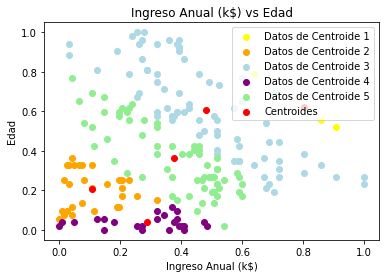

In [460]:
CFXp = []
CFYp = []
for CFelement in CFCentroides:
    CFXp.append(CFelement[0])
    CFYp.append(CFelement[1])

Colors = ['yellow', 'orange', 'lightblue', 'purple', 'lightgreen']

for idx, CFPuntos in enumerate(CFPuntosDCentr):
    CFXColor = []
    CFYColor = []
    for CFelement in CFPuntos:
        CFXColor.append(CFelement[0])
        CFYColor.append(CFelement[1])
    plt.scatter(CFXColor, CFYColor, color = Colors[idx], label = 'Datos de Centroide ' + str(idx + 1))
    
plt.scatter(CFXp, CFYp, color = 'red', label = 'Centroides')
plt.title('Ingreso Anual (k$) vs Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.legend()
plt.show()

Visualizamos las coordenas de los centroides finales del método Birch.

In [461]:
for idx, CFCentroide in enumerate(CFCentroides):
    print('El centroide', str(idx + 1), 'tiene coordenadas', str(CFCentroide) + '.')

El centroide 1 tiene coordenadas (0.8032786885245903, 0.6217948717948718).
El centroide 2 tiene coordenadas (0.10712266817410966, 0.20490716180371357).
El centroide 3 tiene coordenadas (0.4804539722572511, 0.6074950690335307).
El centroide 4 tiene coordenadas (0.2868852459016394, 0.03926282051282052).
El centroide 5 tiene coordenadas (0.37593144560357683, 0.36451048951048953).


# Generamos funciones globales con cada método

## Función K-means o K-means++

In [98]:
def Kmeans_own(NumCentroides, puntosIN, IniType):
    import random as rd
    import numpy as np

    def Centrs_aleat(NumDCentrs):
        idxCentrs = range(1, NumDCentrs + 1)

        Centrs = []
        for K in idxCentrs:
            Centrs.append((rd.random(), rd.random()))
        return(Centrs)
    
    def CentrsPP(NumDcentrs, PuntosIn):
        First_Centr = (rd.random(), rd.random())
        Centrs = [First_Centr]
        for NumCent in range(1, NumDcentrs, 1):
            Dists = distACentrsXpunto(Centrs, PuntosIn)
            Minpunto = Dists[0]
            for CentN in Dists:
                for idx, distN in enumerate(CentN):
                    if distN < Minpunto[idx]:
                        Minpunto[idx]  = distN
            distmin = max(Minpunto)
            Minpunto = np.array(Minpunto)
            posMinpunto = np.where(Minpunto == distmin)
            Centrs.append(PuntosIn[posMinpunto[0][0]])
        return(Centrs)

    def Centrs_promedio(Datos):
        Centrs = []
        for K in Datos:
            sumaX = 0
            sumaY = 0
            for data in K:
                sumaX += data[0]
                sumaY += data[1]
            X = sumaX / len(K)
            Y = sumaY / len(K)
            Centrs.append((X, Y))
        return(Centrs)

    def distACentrsXpunto(Centrs, DaXpuntos):
        dist = []
        for element in Centrs:
            distXData = []
            for DaXpunto in DaXpuntos:
                distData = ((element[0] - DaXpunto[0])**2 + (element[1] - DaXpunto[1])**2)**0.5
                distXData.append(distData)
            dist.append(distXData)
        return(dist)

    def Dato2CentrX(D2Xpuntos, dist):
        MinimIdx = []
        for idx, D2Xpunto in enumerate(D2Xpuntos):
            inim = []
            for element in dist:
                inim.append(element[idx])
            minimo = min(inim)
            MinIdx = inim.index(minimo)
            MinimIdx.append(MinIdx)
        return(MinimIdx)

    def AgrupDatos(ADCentroides, ADCentroideXDato, ADPuntos):
        ADPuntosDCentr = []
        for idx, ADCentroide in enumerate(ADCentroides):
            PuntosDColorX = []
            positions = np.where(ADCentroideXDato == idx)
            for position in positions[0]:
                PuntosDColorX.append(ADPuntos[position])
            ADPuntosDCentr.append(PuntosDColorX)
        return(ADPuntosDCentr)

    #def Predict(data):
        #distancias = distACentrsXpunto(Centroides, data)
        #CentroideXDato = Dato2CentrX(data, distancias)
        #Pertenencias = []
        #for element in CentroideXDato:
        #    Pertenencias.append(element + 1)
        #Pertenencia = np.array(Pertenencias)
        #return(Pertenencia)
    
    if IniType == 'random':
        Centroides = Centrs_aleat(NumCentroides)
    elif IniType == 'kmeans++':
        Centroides = CentrsPP(NumCentroides, puntosIN)
    else:
        print("Elige un método de inicialización: 'random' o 'kmeans++' ")
        return()
        
    Centroides = Centrs_aleat(NumCentroides)
    distancias = distACentrsXpunto(Centroides, puntosIN)
    CentroideXDato = Dato2CentrX(puntosIN, distancias)
    CentroideXDato = np.array(CentroideXDato)
    PuntosDCentr = AgrupDatos(Centroides, CentroideXDato, puntosIN)
    Centroides = Centrs_promedio(PuntosDCentr)
    
    Centroides_anterior = 0
    while Centroides_anterior != Centroides:
        Centroides_anterior = Centroides
        distancias = distACentrsXpunto(Centroides_anterior, puntosIN)
        CentroideXDato = Dato2CentrX(puntosIN, distancias)
        CentroideXDato = np.array(CentroideXDato)
        PuntosDCentr = AgrupDatos(Centroides_anterior, CentroideXDato, puntosIN)
        Centroides = Centrs_promedio(PuntosDCentr)
        
    return(Centroides, CentroideXDato, PuntosDCentr)

## Función Birch

In [99]:
def Birch_own(NumCentroides, PuntosIN, UmbralIN, BIN, LIN):    
    import numpy as np
    import random as rd
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    from sklearn.cluster import KMeans

    def LS(LSpuntos):
        LSsumaX = 0
        LSsumaY = 0
        for LSpunto in LSpuntos:
            LSsumaX += LSpunto[0]
            LSsumaY += LSpunto[1]
        return((LSsumaX, LSsumaY))

    def SS(SSpuntos):
        SSsuma = 0
        for SSpunto in SSpuntos:
            SSPX = SSpunto[0]**2
            SSPY = SSpunto[1]**2
            SSsuma += SSPX + SSPY
        return(SSsuma)

    def centroid(Cpuntos):
        LS_temp = LS(Cpuntos)
        Nc = len(Cpuntos)
        return((LS_temp[0] / Nc, LS_temp[1] / Nc))

    def CF_centroid(CFc):
        NCFc = CFc[0]
        CFcX = CFc[1][0] / NCFc
        CFcY = CFc[1][1] / NCFc
        return((CFcX, CFcY))

    def Radius(Rpuntos):
        Nr = len(Rpuntos)
        RP1 = SS(Rpuntos) / Nr
        RP2 = centroid(Rpuntos)**2
        R_temp = (RP1 - RP2)**0.5
        return(R_temp)

    def Diameter(CFDin):
        DN = CFDin[0]
        DLs = LS([CFDin[1]])
        DLs = max(DLs)
        DSs = SS([CFDin[1]])
        DP1 = 2 * DN * DSs
        DP2 = -2 * (DLs**2)
        DP3 = DN**2
        D_temp = (DP1 + DP2) / DP3
        return(D_temp)

    def CF(CFpuntos):
        LS_temp = LS(CFpuntos)
        SS_temp = SS(CFpuntos)
        NCF = len(CFpuntos)
        return([NCF, LS_temp, SS_temp])

    def CF_merge(CF1, CF2):
        CF1_1 = CF1[1]
        CF2_1 = CF2[1]
        CFr = [CF1[0] + CF2[0], (CF1_1[0] + CF2_1[0], CF1_1[1] + CF2_1[1]), CF1[2] + CF2[2]]
        return(CFr)

    def EC_distance(EDpuntos):
        dist = ((EDpuntos[0][0] - EDpuntos[1][0])**2 + (EDpuntos[0][1] - EDpuntos[1][1])**2)**0.5
        return(dist)

    def ForinCentroids(FiCs, height):
        if height == 0:
            FiC_CF = FiCs
        elif height == 1:
            FiC_CF = [0, (0, 0), 0]
            for FiC in FiCs:
                FiC_CF = [FiC_CF[0] + FiC[0], (FiC_CF[1][0] + FiC[1][0], FiC_CF[1][1] + FiC[1][1]), FiC_CF[2] + FiC[2]]
        else:
            FiC_CF = [0, (0, 0), 0]
            idx = height - 1
            for FiC in FiCs:
                FiCt = ForinCentroids(FiC, idx)
                FiC_CF = [FiC_CF[0] + FiCt[0], (FiC_CF[1][0] + FiCt[1][0], FiC_CF[1][1] + FiCt[1][1]), FiC_CF[2] + FiCt[2]]
        return(FiC_CF)

    def AllCentroids(ACelements, ACnum):
        cent = []
        for CFi in ACelements:
            CFNLN = ForinCentroids(CFi, ACnum)
            centa = CF_centroid(CFNLN)
            cent.append(centa)
        return(cent)

    def AllDists(ADelements, CFa):
        distAll = []
        for ADelement in ADelements:
            dista = EC_distance([CFa, ADelement])
            distAll.append(dista)
        return(distAll)

    def Select_TE(TreeElement, TEpunto, TEidx):
        TECent = AllCentroids(TreeElement, TEidx)
        TEDist = AllDists(TECent, TEpunto)
        TEmDist = min(TEDist)
        TEDist = np.array(TEDist)
        TEmPosa = np.where(TEDist == TEmDist)
        return(TEmPosa[0][0])

    def CFClosest(Rootin, punto):
        mRootpos = Select_TE(Rootin, punto, 2)
        mNonLNpos = Select_TE(Rootin[mRootpos], punto, 1)
        mLeafNodepos = Select_TE(Rootin[mRootpos][mNonLNpos], punto, 0)
        CFmca = Rootin[mRootpos][mNonLNpos][mLeafNodepos]
        return(CFmca, mRootpos, mNonLNpos, mLeafNodepos)

    def farthest(LNin):
        FE = []
        FEpos = []
        for CFsplit1 in LNin:
            for CFsplit2 in LNin:
                FEt = EC_distance([CFsplit1[1], CFsplit2[1]])
                if FEt not in FE:
                    FE.append(FEt)
                    FEpos.append([CFsplit1, CFsplit2])
        F = max(FE)
        FE = np.array(FE)
        Fpos = np.where(FE == F)
        CFf1 = FEpos[Fpos[0][0]][0]
        CFf2 = FEpos[Fpos[0][0]][1]
        return(CFf1, CFf2)

    def AllCF(ARoot):
        AllCFs = []
        for ANLN in ARoot:
            for ALN in ANLN:
                for ACF in ALN:
                    AllCFs.append(ACF)
        return(AllCFs)

    def ReduceXCFtree(Tin, RRoot, RBin, RLin):
        newT = Tin + 0.1
        CF_Done = AllCF(RRoot)
        newRoot = [[[CF_Done[0]]]]
        for Ridx, RCF in enumerate(CF_Done[1:]):
            CFmc_all = CFClosest(newRoot, RCF[1])
            CFmc = CFmc_all[0]
            Da = Diameter(newRoot[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
            CFa = RCF
            if Da < newT:
                newCF = CF_merge(CFa, CFmc)
                newRoot[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF
            else:
                if len(newRoot[CFmc_all[1]][CFmc_all[2]]) < RLin:
                    newRoot[CFmc_all[1]][CFmc_all[2]].append(CFa)
                else:
                    if len(newRoot[CFmc_all[1]]) < RBin:
                        CFf = farthest(newRoot[CFmc_all[1]][CFmc_all[2]])

                        LNold = []
                        for element in newRoot[CFmc_all[1]][CFmc_all[2]]:
                            if element not in CFf:
                                LNold.append(element)

                        LNold.append(CFa)
                        newRoot[CFmc_all[1]][CFmc_all[2]] = [CFf[0]]
                        newRoot[CFmc_all[1]].append([CFf[1]])

                        for element in LNold:
                            tempD1 = EC_distance([CFf[0][1], element[1]])
                            tempD2 = EC_distance([CFf[1][1], element[1]])
                            dest = min([tempD1, tempD2])
                            if dest == 0:
                                newRoot[CFmc_all[1]][CFmc_all[2]].append(element)
                            else:
                                newRoot[CFmc_all[1]][-1].append(element)
                    else:
                        NLNtemp = []
                        for element in newRoot[CFmc_all[1]]:
                            newCF = (0, (0, 0), 0)
                            for element2 in element:
                                    newCF = [newCF[0] + element2[0], 
                                             (newCF[1][0] + element2[1][0], newCF[1][1] + element2[1][1]), 
                                             newCF[2] + element2[2]]
                            NLNtemp.append(newCF)

                        CFf = farthest(NLNtemp)

                        ele2 = []

                        for idx, elment in enumerate(NLNtemp):
                            if element not in CFf:
                                ele2.append(newRoot[CFmc_all[1]][idx])

                        ele2.append([CFa])

                        LNold = []
                        for element in NLNtemp:
                            if element not in CFf:
                                LNold.append(element)

                        LNold.append(CFa)

                        newRoot[CFmc_all[1]] = [[CFf[0]]]
                        newRoot.append([[CFf[1]]])

                        for idx, element in enumerate(LNold):
                            tempD1 = EC_distance([CFf[0][1], element[1]])
                            tempD2 = EC_distance([CFf[1][1], element[1]])
                            dest = min([tempD1, tempD2])

                            if dest == 0:
                                newRoot[CFmc_all[1]].append(ele2[idx])
                            else:
                                newRoot[-1].append(ele2[idx])

        return(newT, newRoot)

    def RootOutliers(RootIn):
        OutNum = []
        for OutNLN in RootIn:
            for OutLN in OutNLN:
                for OutCF in OutLN:
                    OutNum.append(OutCF[0])

        OutSum = 0
        for OutElement in OutNum:
            OutSum += OutElement

        OutProm = OutSum / len(OutNum)

        ROutRoot = []
        ROutliers = []
        for OutNLN in RootIn:
            ROutNLN = []
            for OutLN in OutNLN:
                ROutLN = []
                for OutCF in OutLN:
                    if OutCF[0] >= (OutProm / 2):
                        ROutLN.append(OutCF)
                    else:
                        ROutliers.append(OutCF)
                if len(ROutLN) != 0:
                    ROutNLN.append(ROutLN)
            if len(ROutLN) != 0:
                ROutRoot.append(ROutNLN)

        return(ROutRoot, ROutliers)

    def CFtree(puntosTree, T, BTree, LTree):
        DT = T
        NCFt = len(puntosTree)
        puntosSH = rd.sample(puntosTree, NCFt)

        fOutliers = []
        Root = [[[CF([puntosSH[0]])]]]
        for idx, punto in enumerate(puntosSH[1:]):
            CFmc_all = CFClosest(Root, punto)
            CFmc = CFmc_all[0]
            Da = Diameter(Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
            CFa = CF([punto])
            if Da < DT:
                newCF = CF_merge(CFa, CFmc)
                Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF
            else:
                if len(Root[CFmc_all[1]][CFmc_all[2]]) < LTree:
                    Root[CFmc_all[1]][CFmc_all[2]].append(CFa)
                else:
                    if len(Root[CFmc_all[1]]) < BTree:
                        CFf = farthest(Root[CFmc_all[1]][CFmc_all[2]])

                        LNold = []
                        for element in Root[CFmc_all[1]][CFmc_all[2]]:
                            if element not in CFf:
                                LNold.append(element)

                        LNold.append(CFa)
                        Root[CFmc_all[1]][CFmc_all[2]] = [CFf[0]]
                        Root[CFmc_all[1]].append([CFf[1]])

                        for element in LNold:
                            tempD1 = EC_distance([CFf[0][1], element[1]])
                            tempD2 = EC_distance([CFf[1][1], element[1]])
                            dest = min([tempD1, tempD2])
                            if dest == 0:
                                Root[CFmc_all[1]][CFmc_all[2]].append(element)
                            else:
                                Root[CFmc_all[1]][-1].append(element)
                    else:
                        if len(Root) < BTree:
                            NLNtemp = []
                            for element in Root[CFmc_all[1]]:
                                newCF = (0, (0, 0), 0)
                                for element2 in element:
                                        newCF = [newCF[0] + element2[0], 
                                                 (newCF[1][0] + element2[1][0], newCF[1][1] + element2[1][1]), 
                                                 newCF[2] + element2[2]]
                                NLNtemp.append(newCF)

                            CFf = farthest(NLNtemp)

                            ele2 = []

                            for idx, elment in enumerate(NLNtemp):
                                if element not in CFf:
                                    ele2.append(Root[CFmc_all[1]][idx])

                            ele2.append([CFa])

                            LNold = []
                            for element in NLNtemp:
                                if element not in CFf:
                                    LNold.append(element)

                            LNold.append(CFa)

                            Root[CFmc_all[1]] = [[CFf[0]]]
                            Root.append([[CFf[1]]])

                            for idx, element in enumerate(LNold):
                                tempD1 = EC_distance([CFf[0][1], element[1]])
                                tempD2 = EC_distance([CFf[1][1], element[1]])
                                dest = min([tempD1, tempD2])

                                if dest == 0:
                                    Root[CFmc_all[1]].append(ele2[idx])
                                else:
                                    Root[-1].append(ele2[idx])
                        else:
                            Reduced = ReduceXCFtree(DT, Root, BTree, LTree)
                            DT = Reduced[0]
                            Root = Reduced[1]
                            POL = RootOutliers(Root)
                            Root = POL[0]
                            fOutliers = POL[1]

        for PosOutliers in fOutliers:
            CFmc_all = CFClosest(Root, PosOutliers[1])
            CFmc = CFmc_all[0]
            Da = Diameter(Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]])
            CFa = PosOutliers
            if Da < DT:
                newCF = CF_merge(CFa, CFmc)
                Root[CFmc_all[1]][CFmc_all[2]][CFmc_all[3]] = newCF

        return(Root)

    def NormalizaPuntos(NPuntos):

        Xs = []
        Ys = []
        for NPunto in NPuntos:
            Xs.append(NPunto[0])
            Ys.append(NPunto[1])


        MaximoDeX = max(Xs)
        MinimoDeX = min(Xs)
        MaximoDeY = max(Ys)
        MinimoDeY = min(Ys)

        PuntosNorm = []
        MaximoNormalizado = 1
        MinimoNormalizado = 0
        RangoNormalizado = MaximoNormalizado - MinimoNormalizado
        for Npunto in NPuntos:
            RangodeDatosX = MaximoDeX - MinimoDeX
            RangodeDatosY = MaximoDeY - MinimoDeY

            DX = Npunto[0] - MinimoDeX
            DY = Npunto[1] - MinimoDeY

            DPctX = DX / RangodeDatosX
            DPctY = DY / RangodeDatosY

            dNormX = RangoNormalizado * DPctX
            dNormY = RangoNormalizado * DPctY

            NormalizadoX = MinimoNormalizado + dNormX
            NormalizadoY = MinimoNormalizado + dNormY

            PuntosNorm.append((NormalizadoX, NormalizadoY))

        return(PuntosNorm)

    def AgrupDatos(ADCentroides, ADCentroideXDato, ADPuntos):
        ADPuntosDCentr = []
        for idx, ADCentroide in enumerate(ADCentroides):
            PuntosDColorX = []
            positions = np.where(ADCentroideXDato == idx)
            for position in positions[0]:
                PuntosDColorX.append(ADPuntos[position])
            ADPuntosDCentr.append(PuntosDColorX)
        return(ADPuntosDCentr)

    def distACentrsXpunto(Centrs, DaXpuntos):
        dist = []
        for element in Centrs:
            distXData = []
            for DaXpunto in DaXpuntos:
                distData = ((element[0] - DaXpunto[0])**2 + (element[1] - DaXpunto[1])**2)**0.5
                distXData.append(distData)
            dist.append(distXData)
        return(dist)

    def Dato2CentrX(D2Xpuntos, dist):
        MinimIdx = []
        for idx, D2Xpunto in enumerate(D2Xpuntos):
            inim = []
            for element in dist:
                inim.append(element[idx])
            minimo = min(inim)
            MinIdx = inim.index(minimo)
            MinimIdx.append(MinIdx)
        return(MinimIdx)

    def Centrs_promedio(Datos):
        Centrs = []
        for K in Datos:
            sumaX = 0
            sumaY = 0
            for data in K:
                sumaX += data[0]
                sumaY += data[1]
            X = sumaX / len(K)
            Y = sumaY / len(K)
            Centrs.append((X, Y))
        return(Centrs)

    rootf = CFtree(PuntosIN, UmbralIN, BIN, LIN)
    
    CFpoints = []
    for NLNf in rootf:
        for LNf in NLNf:
            for CFf in LNf:
                CFpoints.append(CFf[1])

    CFpoints_Norm = NormalizaPuntos(CFpoints)

    CFkmeans = KMeans(n_clusters=NumCentroides, init='k-means++', n_init=1, random_state=0).fit(CFpoints_Norm)
    CFCentroideXDato = CFkmeans.labels_
    CFCentroides = CFkmeans.cluster_centers_
    CFPuntosDCentr = AgrupDatos(CFCentroides, CFCentroideXDato, PuntosIN)

    CFdistancias = distACentrsXpunto(CFCentroides, PuntosIN)
    CFCentroideXDato = Dato2CentrX(PuntosIN, CFdistancias)
    CFCentroideXDato = np.array(CFCentroideXDato)
    CFPuntosDCentr = AgrupDatos(CFCentroides, CFCentroideXDato, PuntosIN)
    
    CFCentroides = Centrs_promedio(CFPuntosDCentr)
    
    return(CFCentroides, CFCentroideXDato, CFPuntosDCentr)

# Ejecutamos método K-Fold con cada método

Elegimos un K = 5

## Dividimos los datos para entrenamiento y validación

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
XtrainAll, Xtest, YtrainAll, Ytest = train_test_split(X, Y, train_size = 0.90)

In [12]:
CantDdatosDB = len(puntos)

Veinte = int((CantDdatosDB * 20) / 100)
Cuarenta = int((CantDdatosDB * 40) / 100)
Sesenta = int((CantDdatosDB * 60) / 100)

In [13]:
Xtrain1, Xval1 = XtrainAll[:-Veinte], XtrainAll[-Veinte:]
Ytrain1, Yval1 = YtrainAll[:-Veinte], YtrainAll[-Veinte:]

Xtrain2, Xval2 = list(XtrainAll[:-Cuarenta]), XtrainAll[-Cuarenta:-Veinte]
Xtrain2 += list(XtrainAll[-Veinte:])
Xtrain2 = np.array(Xtrain2)
Ytrain2, Yval2 = list(YtrainAll[:-Cuarenta]), YtrainAll[-Cuarenta:-Veinte]
Ytrain2 += list(YtrainAll[-Veinte:])
Ytrain2 = np.array(Ytrain2)

Xtrain3, Xval3 = list(XtrainAll[:-Sesenta]), XtrainAll[-Sesenta:-Cuarenta]
Xtrain3 += list(XtrainAll[-Cuarenta:])
Xtrain3 = np.array(Xtrain3)
Ytrain3, Yval3 = list(YtrainAll[:-Sesenta]), YtrainAll[-Sesenta:-Cuarenta]
Ytrain3 += list(YtrainAll[-Cuarenta:])
Ytrain3 = np.array(Ytrain3)

Xtrain4, Xval4 = list(XtrainAll[:Veinte]), XtrainAll[Veinte:Cuarenta]
Xtrain4 += list(XtrainAll[Cuarenta:])
Xtrain4 = np.array(Xtrain4)
Ytrain4, Yval4 = list(YtrainAll[:Veinte]), YtrainAll[Veinte:Cuarenta]
Ytrain4 += list(YtrainAll[Cuarenta:])
Ytrain4 = np.array(Ytrain4)

Xtrain5, Xval5 = XtrainAll[Veinte:], XtrainAll[:Veinte]
Ytrain5, Yval5 = YtrainAll[Veinte:], YtrainAll[:Veinte]

In [14]:
fAllpoints = []
fAllpoints.append(data2point(Xtrain1, Ytrain1))
fAllpoints.append(data2point(Xtrain2, Ytrain2))
fAllpoints.append(data2point(Xtrain3, Ytrain3))
fAllpoints.append(data2point(Xtrain4, Ytrain4))
fAllpoints.append(data2point(Xtrain5, Ytrain5))

## Ejecutamos los algoritmos k veces

In [121]:
import time
FResults = []
for tiempo in range(0, 5, 1):
    FPoints = fAllpoints[tiempo]
    KmeansRes = Kmeans_own(5, FPoints, 'random')
    time.sleep(0.1)
    KmeansppRes = Kmeans_own(5, FPoints, 'kmeans++')
    time.sleep(0.1)
    BirchRes = Birch_own(5, FPoints, 0.15, 8, 8)
    time.sleep(0.1)
    FResults.append([KmeansRes, KmeansppRes, BirchRes])

## Generamos el promedio de los centroides resultantes de cada método y los comparamos

In [157]:
SumaFinal = [[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], 
             [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], 
             [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)]]
SumaFinal = np.array(SumaFinal)

for FResult in FResults:
    for idx, method in enumerate(FResult):
        for idx2, FCent in enumerate(method[0]):
            SumaFinal[idx][idx2][0] += FCent[0]
            SumaFinal[idx][idx2][1] += FCent[1]
            

K = len(FResults)

for idx, method in enumerate(SumaFinal):
    for idx2, FCent in enumerate(method):
        SumaFinal[idx][idx2][0] = SumaFinal[idx][idx2][0] / K
        SumaFinal[idx][idx2][1] = SumaFinal[idx][idx2][1] / K

PromKmeans = SumaFinal[0]
PromKmeanspp = SumaFinal[1]
PromBirch = SumaFinal[2]

In [158]:
print('Coordenas del centroide resultante del algoritmo de Kmeans:\n', str(PromKmeans) + '.')
print('Coordenas del centroide resultante del algoritmo de Kmeans++:\n', str(PromKmeanspp) + '.')
print('Coordenas del centroide resultante del algoritmo de Birch:\n', str(PromBirch) + '.')

Coordenas del centroide resultante del algoritmo de Kmeans:
 [[0.4913991  0.5028844 ]
 [0.22468127 0.56591013]
 [0.4740199  0.40603222]
 [0.36704096 0.33680564]
 [0.39987564 0.32595085]].
Coordenas del centroide resultante del algoritmo de Kmeans++:
 [[0.2847356  0.38246029]
 [0.28893414 0.47529779]
 [0.45102193 0.49885024]
 [0.47478001 0.43606352]
 [0.4267866  0.35422725]].
Coordenas del centroide resultante del algoritmo de Birch:
 [[0.17393593 0.27139007]
 [0.44207272 0.49100261]
 [0.52542442 0.5102827 ]
 [0.18087292 0.34217406]
 [0.36050284 0.19148221]].


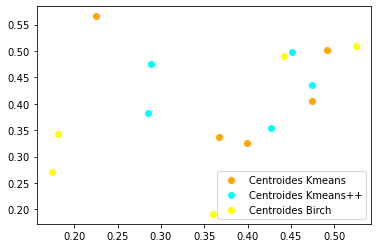

In [165]:
CFXp1 = []
CFYp1 = []
for CFelement in PromKmeans:
    CFXp1.append(CFelement[0])
    CFYp1.append(CFelement[1])
    
CFXp2 = []
CFYp2 = []
for CFelement in PromKmeanspp:
    CFXp2.append(CFelement[0])
    CFYp2.append(CFelement[1])
    
CFXp3 = []
CFYp3 = []
for CFelement in PromBirch:
    CFXp3.append(CFelement[0])
    CFYp3.append(CFelement[1])
    
plt.scatter(CFXp1, CFYp1, color = 'orange', label = 'Centroides Kmeans')
plt.scatter(CFXp2, CFYp2, color = 'cyan', label = 'Centroides Kmeans++')
plt.scatter(CFXp3, CFYp3, color = 'yellow', label = 'Centroides Birch')
plt.legend()
plt.show()

En este punto se puede destacar que no se encontró una manera de utilizar el K-Fold con datos no etiquetados, por lo tanto se procedió buscar métricas más adecuadas para estos casos.

## Evaluamos el rendimiento de los resultados de cada método

Nota: en ocaciones repetidas, los algoritmos terminan con una lista vacía debido a la aleatoriedad, generando una división entre 0, por lo que es necesario seguir ejecutando hasta que esta condición no se presente de ser así.

In [180]:
from sklearn.metrics import silhouette_score


KmeansRes = Kmeans_own(5, puntos, 'random')

KmeansppRes = Kmeans_own(5, puntos, 'kmeans++')

BirchRes = Birch_own(5, puntos, 0.15, 8, 8)

Kmeans_sil = silhouette_score(puntos, KmeansRes[1])
Kmeanspp_sil = silhouette_score(puntos, KmeansppRes[1])
Birch_sil = silhouette_score(puntos, BirchRes[1])

Se presentan los resultados obtenidos del silhouette score:

In [181]:
print('Silhouette_score del algoritmo de Kmeans:', str(Kmeans_sil) + '.')
print('Silhouette_score del algoritmo de Kmeans++:', str(Kmeanspp_sil) + '.')
print('Silhouette_score del algoritmo de Birch:', str(Birch_sil) + '.')

Silhouette_score del algoritmo de Kmeans: 0.3692004019734756.
Silhouette_score del algoritmo de Kmeans++: 0.3788938637180651.
Silhouette_score del algoritmo de Birch: 0.2565934856744897.


Es posible determinar que el algoritmo de Kmeans++ generalmente, no siempre debido a la aleatoriedad, genera una mejor agrupación que el Kmeans común, mientras que ambos Kmean, obtienen un mejor resultado que el algoritmo de Birch, considerando que la fortaleza del algoritmo de Birch se encuentra en reducir el tiempo de ejecución para bases de datos muy grandes. Sin embargo, al tener un rango entre -1 y 1 para el score obtenido, se puede concluir que aún es posible realizar una mejor agrupación, aunque al no entrar en el rango negativo, es un resultado medianamente satisfactorio. 